<a href="https://colab.research.google.com/github/Desmondonam/DS_Python/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series forecasting is a branch of data analysis that deals with predicting future values based on past observations, where the data points are ordered by time. Time series data is commonly encountered in various domains, including finance, economics, weather, sales, and many others. The goal of time series forecasting is to develop models that can capture the underlying patterns and trends in the data, allowing us to make predictions for future time points.

There are several models used for time series forecasting, each with its own strengths and assumptions. Some of the most commonly used time series forecasting models include:

Autoregressive Integrated Moving Average (ARIMA):
ARIMA is a widely used model for univariate time series forecasting. It combines autoregression (AR), differencing (I), and moving average (MA) components to model the temporal dependencies and fluctuations in the data. ARIMA models assume that the time series is stationary, which means that the statistical properties remain constant over time.

Seasonal Autoregressive Integrated Moving-Average (SARIMA):
SARIMA extends the ARIMA model to account for seasonality in the data. It includes additional seasonal terms to capture periodic patterns that repeat over fixed intervals. SARIMA is suitable for data that exhibits seasonal patterns.

Exponential Smoothing (ETS):
Exponential smoothing methods use exponentially weighted moving averages to make predictions. There are different variants of ETS models, including Simple Exponential Smoothing (SES), Double Exponential Smoothing (Holt-Winters), and Triple Exponential Smoothing (Holt-Winters with seasonality). ETS models are versatile and can handle both trended and seasonal data.

Prophet:
Prophet is a forecasting model developed by Facebook. It is designed to handle time series data with strong seasonality and multiple seasonal components. Prophet can also handle missing data and outliers effectively.

Seasonal Decomposition of Time Series (STL):
STL is a time series decomposition method that separates a time series into three components: seasonal, trend, and remainder (residual). It is useful for understanding the underlying patterns in the data and can be used in conjunction with other forecasting models.

Long Short-Term Memory (LSTM):
LSTM is a type of recurrent neural network (RNN) that is well-suited for sequence prediction tasks, including time series forecasting. LSTM models can capture long-term dependencies and are especially effective when dealing with data with complex temporal patterns.

Seasonal Autoregressive Integrated Moving-Average with eXogenous regressors (SARIMAX):
SARIMAX is an extension of SARIMA that includes additional exogenous variables or regressors to enhance the forecasting accuracy. This is particularly useful when external factors influence the time series.

Vector Autoregression (VAR):
VAR is a multivariate time series model that can be used when you have multiple related time series variables. It models the relationships between variables over time and can be extended to VARMA (Vector Autoregressive Moving Average) models.

Choosing the appropriate time series forecasting model depends on the nature of the data, the presence of seasonality, trend, and other temporal patterns, as well as the specific problem you want to solve. It's essential to analyze and understand the characteristics of the data before selecting the most suitable model.

In [2]:
!pip install statsmodels prophet pandas matplotlib


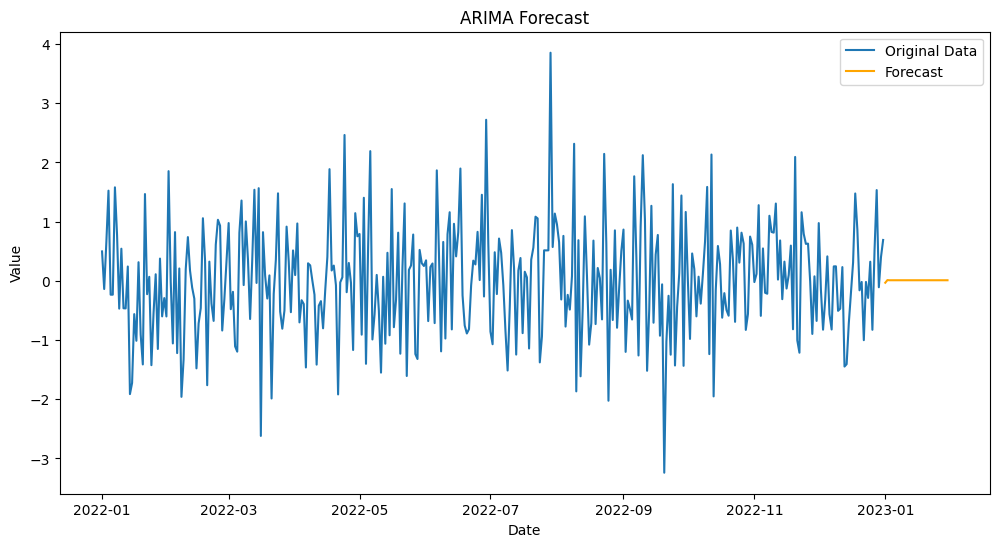

In [3]:
## Using ARIMA with built-in dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create a sample time series data (You can replace this with your own dataset)
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
time_series_data = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1, 0, 0))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

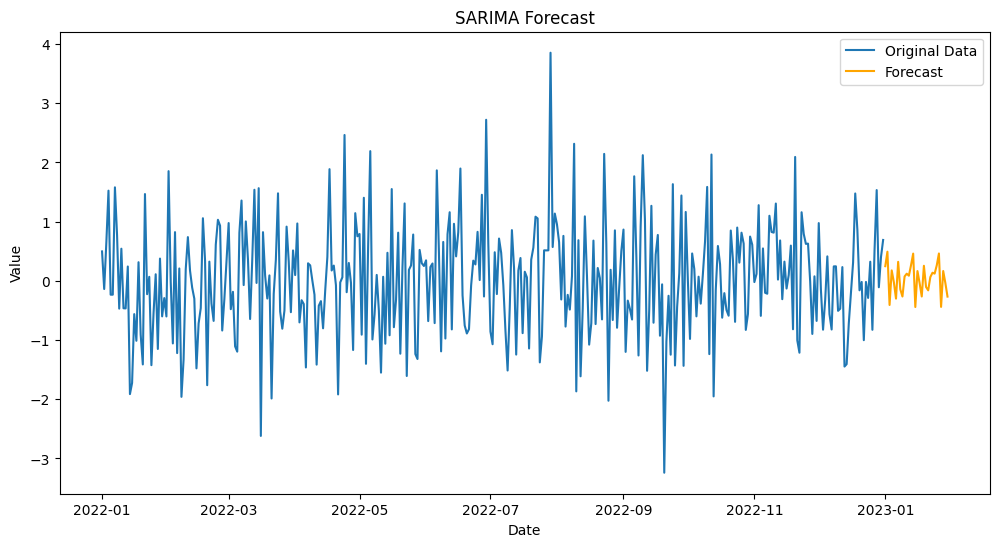

In [4]:
## using SARIMA with built-indataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a sample time series data (You can replace this with your own dataset)
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
time_series_data = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Fit SARIMA model
model = SARIMAX(time_series_data, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjxasyvzh/oeilw6aj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjxasyvzh/28sel9pn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26144', 'data', 'file=/tmp/tmpjxasyvzh/oeilw6aj.json', 'init=/tmp/tmpjxasyvzh/28sel9pn.json', 'output', 'file=/tmp/tmpjxasyvzh/prophet_modelppt09qxv/prophet_model-20230725204154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:41:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


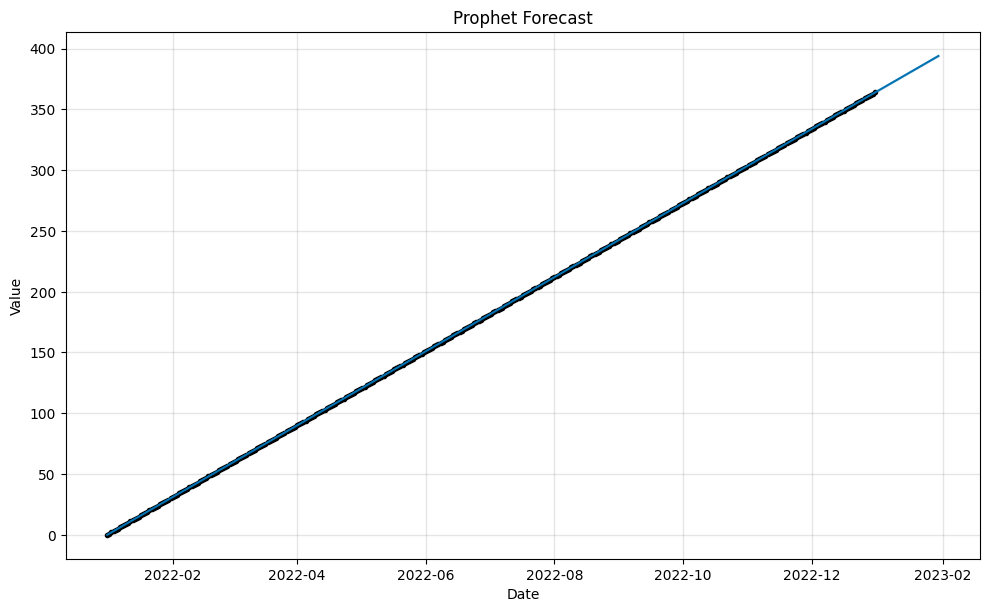

In [5]:
## Using prophet model
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Create a sample time series data (You can replace this with your own dataset)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
time_series_data = pd.DataFrame({'ds': date_rng, 'y': range(len(date_rng))})

# Fit Prophet model
model = Prophet()
model.fit(time_series_data)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=30)

# Make predictions for the next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

Epoch 1/100
358/358 - 3s - loss: 0.9088 - 3s/epoch - 9ms/step
Epoch 2/100
358/358 - 1s - loss: 0.9050 - 1s/epoch - 3ms/step
Epoch 3/100
358/358 - 1s - loss: 0.8984 - 1s/epoch - 3ms/step
Epoch 4/100
358/358 - 1s - loss: 0.9013 - 1s/epoch - 3ms/step
Epoch 5/100
358/358 - 1s - loss: 0.8996 - 1s/epoch - 4ms/step
Epoch 6/100
358/358 - 2s - loss: 0.8976 - 2s/epoch - 5ms/step
Epoch 7/100
358/358 - 1s - loss: 0.8978 - 1s/epoch - 4ms/step
Epoch 8/100
358/358 - 1s - loss: 0.8976 - 1s/epoch - 3ms/step
Epoch 9/100
358/358 - 1s - loss: 0.8980 - 1s/epoch - 3ms/step
Epoch 10/100
358/358 - 1s - loss: 0.8972 - 1s/epoch - 3ms/step
Epoch 11/100
358/358 - 1s - loss: 0.8955 - 1s/epoch - 3ms/step
Epoch 12/100
358/358 - 1s - loss: 0.8969 - 1s/epoch - 3ms/step
Epoch 13/100
358/358 - 1s - loss: 0.8935 - 1s/epoch - 3ms/step
Epoch 14/100
358/358 - 1s - loss: 0.8955 - 1s/epoch - 3ms/step
Epoch 15/100
358/358 - 1s - loss: 0.8945 - 1s/epoch - 3ms/step
Epoch 16/100
358/358 - 2s - loss: 0.8882 - 2s/epoch - 5ms/step
E

ValueError: ignored

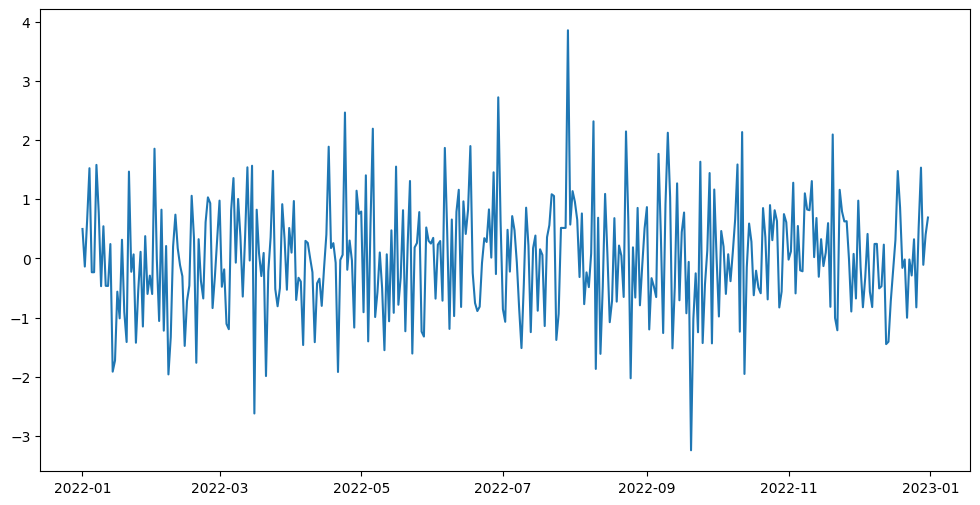

In [6]:
# Long short termmemory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Create a sample time series data (You can replace this with your own dataset)
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
time_series_data = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Preprocess the data for LSTM
def create_lstm_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i+look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Set the look-back period for LSTM
look_back = 7
X, y = create_lstm_dataset(time_series_data.values, look_back)

# Reshape X to 3D format (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64, input_shape=(look_back, 1)))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Make predictions for the next 30 days
last_sequence = time_series_data[-look_back:].values.reshape(1, look_back, 1)
forecast = model.predict(last_sequence)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(date_rng[-1] + pd.to_timedelta(range(1, 31), 'D'), forecast.flatten(), label='Forecast', color='orange')
plt.legend()
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()